In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
with open("utility_record.txt") as textFile:
    elessar = [line.split(", ") for line in textFile]
    
with open("utility_record_primary.txt") as textFile:
    primary = [line.split(", ") for line in textFile]
    
with open("utility_record_conservative.txt") as textFile:
    conservative = [line.split(", ") for line in textFile]

In [42]:
elessar_np = np.array(elessar)
primary_np = np.array(primary)
conservative_np = np.array(conservative)

In [43]:
elessar_np = elessar_np.reshape(1000,-1)
primary_np = primary_np.reshape(1000,-1)
conservative_np = conservative_np.reshape(1000,-1)

In [44]:
for i in range(1000):
    elessar_np[i][0] = elessar_np[i][0][1:]
    elessar_np[i][-1] = elessar_np[i][-1][:-1]
    primary_np[i][0] = primary_np[i][0][1:]
    primary_np[i][-1] = primary_np[i][-1][:-1]
    conservative_np[i][0] = conservative_np[i][0][1:]
    conservative_np[i][-1] = conservative_np[i][-1][:-1]

In [45]:
elessar_np[0][0] = elessar_np[0][0][1:]
elessar_np[-1][-1] = elessar_np[-1][-1][:-2]
primary_np[0][0] = primary_np[0][0][1:]
primary_np[-1][-1] = primary_np[-1][-1][:-2]
conservative_np[0][0] = conservative_np[0][0][1:]
conservative_np[-1][-1] = conservative_np[-1][-1][:-2]

In [46]:
elessar_float = elessar_np.astype(np.float)
primary_float = primary_np.astype(np.float)
conservative_float = conservative_np.astype(np.float)

In [47]:
elessar_mean = np.mean(elessar_float, axis=0)
primary_mean = np.mean(primary_float, axis=0)
conservative_mean = np.mean(conservative_float, axis=0)

In [48]:
xx = np.arange(100)

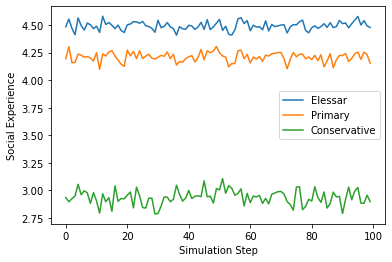

In [49]:
plt.plot(xx, elessar_mean[:100], label="Elessar")
plt.plot(xx, primary_mean[:100], label="Primary")
plt.plot(xx, conservative_mean[:100], label="Conservative")
plt.xlabel("Simulation Step")
plt.ylabel("Social Experience")
plt.legend()
plt.savefig("social_line.png", dpi=300, bbox_inches='tight')

In [50]:
elessar_worst = np.min(elessar_float, axis=0)
primary_worst = np.min(primary_float, axis=0)
conservative_worst = np.min(conservative_float, axis=0)

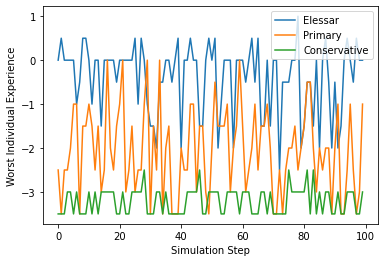

In [51]:
xx = np.arange(100)
plt.plot(xx, elessar_worst[:100], label="Elessar")
plt.plot(xx, primary_worst[:100], label="Primary")
plt.plot(xx, conservative_worst[:100], label="Conservative")
plt.xlabel("Simulation Step")
plt.ylabel("Worst Individual Experience")
plt.legend()
plt.savefig("worst_line.png", dpi=300, bbox_inches='tight')

In [52]:
elessar_best = np.max(elessar_float, axis=0)
primary_best = np.max(primary_float, axis=0)
conservative_best = np.max(conservative_float, axis=0)

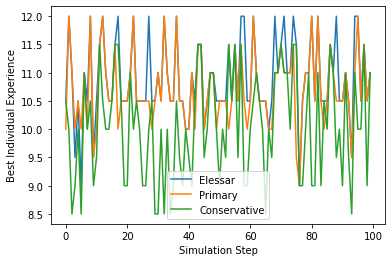

In [53]:
plt.plot(xx, elessar_best[:100], label="Elessar")
plt.plot(xx, primary_best[:100], label="Primary")
plt.plot(xx, conservative_best[:100], label="Conservative")
plt.xlabel("Simulation Step")
plt.ylabel("Best Individual Experience")
plt.legend()
plt.savefig("best_line.png", dpi=300, bbox_inches='tight')

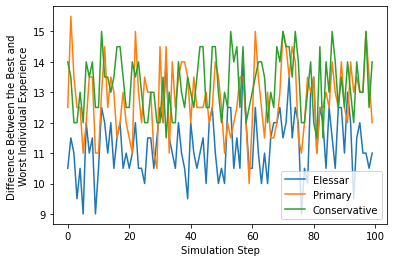

In [54]:
plt.plot(xx, elessar_best[:100] - elessar_worst[:100], label="Elessar")
plt.plot(xx, primary_best[:100] - primary_worst[:100], label="Primary")
plt.plot(xx, conservative_best[:100] - conservative_worst[:100], label="Conservative")
plt.xlabel("Simulation Step")
plt.ylabel("Difference Between the Best and \nWorst Individual Experience")
plt.legend()
plt.savefig("difference_line.png", dpi=300, bbox_inches='tight')

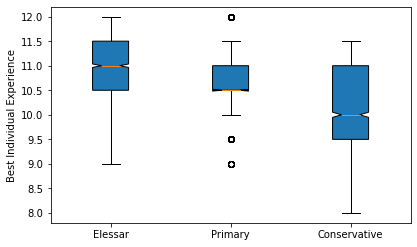

In [55]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
data = [elessar_best, primary_best, conservative_best]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Best Individual Experience")
plt.savefig("best_box.png", dpi=300, bbox_inches='tight')
# show plot
plt.show()

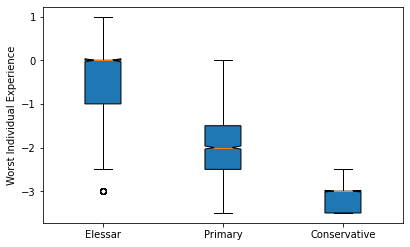

In [56]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
data = [elessar_worst, primary_worst, conservative_worst]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Worst Individual Experience")
plt.savefig("worst_box.png", dpi=300, bbox_inches='tight')
# show plot
plt.show()

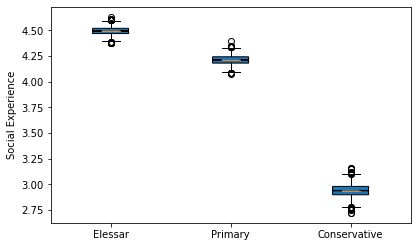

In [57]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
#data = [elessar_float_cum_diff, primary_float_cum_diff, conservative_float_cum_diff]
data = [elessar_mean, primary_mean, conservative_mean]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Social Experience")
plt.savefig("social_box.png", dpi=300, bbox_inches='tight')
# show plot
plt.show()

In [58]:
elessar_float.shape

(1000, 2000)

In [59]:
elessar_float_cum = elessar_float.reshape(1000, 5, -1)
elessar_float_cum.shape

(1000, 5, 400)

In [60]:
elessar_float_cum = np.sum(elessar_float_cum, axis=1)
elessar_float_cum.shape

(1000, 400)

In [61]:
elessar_float_cum_diff = np.max(elessar_float_cum, axis=0) - np.min(elessar_float_cum, axis=0)
elessar_float_cum_diff.shape

(400,)

In [62]:
elessar_float_cum_diff.mean()

33.31375

In [63]:
elessar_fair = 1.0/elessar_float_cum_diff

In [64]:
primary_float_cum = primary_float.reshape(1000, 5, -1)
primary_float_cum = np.sum(primary_float_cum, axis=1)
primary_float_cum_diff = np.max(primary_float_cum, axis=0) - np.min(primary_float_cum, axis=0)

In [65]:
primary_float_cum_diff.mean()

33.11

In [66]:
primary_fair = 1.0/primary_float_cum_diff

In [67]:
conservative_float_cum = conservative_float.reshape(1000, 5, -1)
conservative_float_cum = np.sum(conservative_float_cum, axis=1)
conservative_float_cum_diff = np.max(conservative_float_cum, axis=0) - np.min(conservative_float_cum, axis=0)

In [68]:
conservative_float_cum_diff.mean()

38.6975

In [69]:
conservative_fair = 1.0/conservative_float_cum_diff

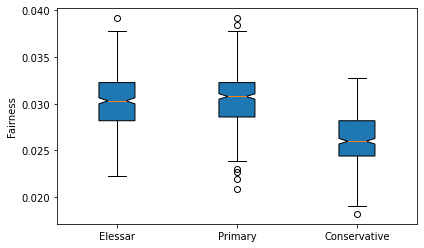

In [70]:
fig = plt.figure(figsize =(5, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
data = [elessar_fair, primary_fair, conservative_fair]
# Creating plot
bp = ax.boxplot(data, notch=True, patch_artist=True)
ax.set_xticklabels(['Elessar', 'Primary','Conservative'])
ax.set_ylabel("Fairness")
plt.savefig("fair_box.png", dpi=300, bbox_inches='tight')
# show plot
plt.show()

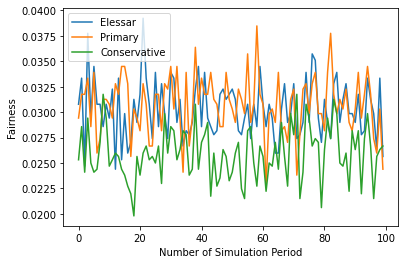

In [71]:
xx = np.arange(100)
plt.plot(xx, elessar_fair[:100], label="Elessar")
plt.plot(xx, primary_fair[:100], label="Primary")
plt.plot(xx, conservative_fair[:100], label="Conservative")
plt.xlabel("Number of Simulation Period")
plt.ylabel("Fairness")
plt.legend()
plt.savefig("fair_line.png", dpi=300, bbox_inches='tight')